In [2]:
# Mapping of start : end mappings of Snakes & ladders Games
CHUTES_LADDERS = {1:38, 28:84, 36:44, 9:31, 16:6, 51:67, 56:53,87:24, 4:14, 21:42, 93:73, 62:19, 64:6,
 71:91, 80:100, 47:26, 49:11, 95:75, 98:78}

In [5]:
#Random Library to generate random Dice moves
from random import Random
def simulate_cl_game(rseed=None, max_roll=6):
 """
 Simulate a full Snakes & Ladders games and return the number of turns to finish one game
 """
 #rseed is given to generate same result everytime
 rand = Random(rseed)
 position = 0
 turns = 0
 while position < 100:
     turns += 1
     roll = rand.randint(1, max_roll)
     # if the roll takes us past square 100, we don't move
     if position + roll > 100:
         continue
     # otherwise, move the position according to the roll
     position += roll
     # go up/down any chute/ladder
     position = CHUTES_LADDERS.get(position, position)
 return turns

In [6]:
simulate_cl_game() #Everytime will give a different number because generating on random

43

Matplotlib is building the font cache; this may take a moment.


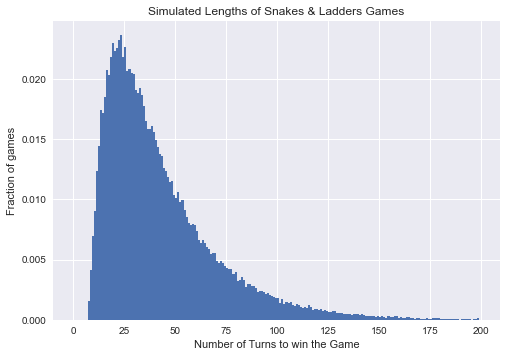

In [9]:
#plotting setup & imports
# %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn')
#Simulating 1 lakh Games
sim_games = [simulate_cl_game() for i in range(100000)]
#Plotting the results
plt.hist(sim_games, bins=range(200), density=True)
plt.xlabel('Number of Turns to win the Game')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Snakes & Ladders Games');

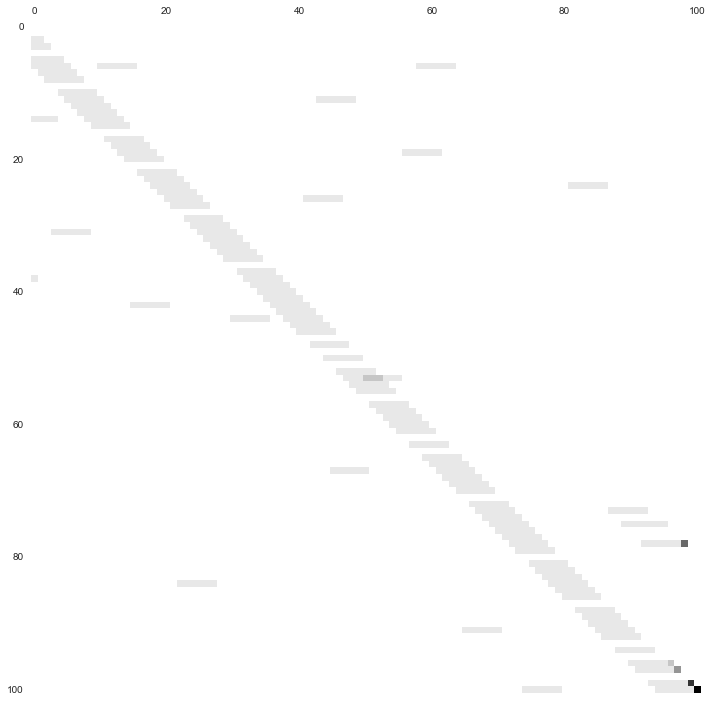

In [13]:
import numpy as np
def cl_markov_matrix(max_roll=6, jump_at_end=True):
     """
     Create a Markov transition matrix If jump_at_end is True, then apply ladder/chute jumps at the en
     each turn. If False, then apply them at the beginning of the next turn.
     """
     # Create the basic transition matrix:
     mat = np.zeros((101, 101))
     for i in range(101):
         mat[i + 1:i + 1 + max_roll, i] = 1. / max_roll
     # rolls off the end of the board don't change the state;
     # add these probabilities to the diagonal
     mat[range(101), range(101)] += 1 - mat.sum(0)
     # account for the presence of chutes and ladders
     # we'll do this via another transition matrix
     cl_mat = np.zeros((101, 101))
     ind = [CHUTES_LADDERS.get(i, i) for i in range(101)]
     cl_mat[ind, range(101)] = 1
     if jump_at_end:
         return cl_mat @ mat
     else:
         return mat @ cl_mat
mat = cl_markov_matrix()
matfig = plt.figure(figsize=(12,12))
plt.matshow(mat,fignum=matfig.number,aspect='auto')
plt.grid(False)

In [15]:
# v_0 = [1, 0, 0, 0, 0...]
np.set_printoptions(suppress=True, precision=2)
v_0 = [1, *np.zeros(100)]
mat @ v_0

array([0.  , 0.  , 0.17, 0.17, 0.  , 0.17, 0.17, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.17, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

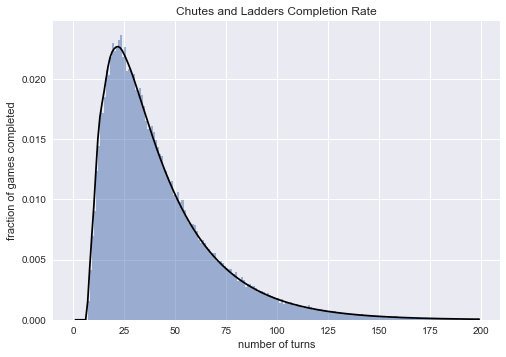

In [16]:
def cl_probability(n):
 """Compute the state vector after n turns"""
 mat = cl_markov_matrix()
 v_0 = [1, *np.zeros(100)]
 return np.linalg.matrix_power(mat, n) @ v_0
probs = [cl_probability(i)[-1] for i in range(200)]
plt.hist(sim_games, bins=range(200), density=True,
 align='mid', alpha=0.5);
plt.plot(np.arange(1, 200), np.diff(probs), color='black')
plt.title('Chutes and Ladders Completion Rate')
plt.xlabel('number of turns')
plt.ylabel('fraction of games completed');

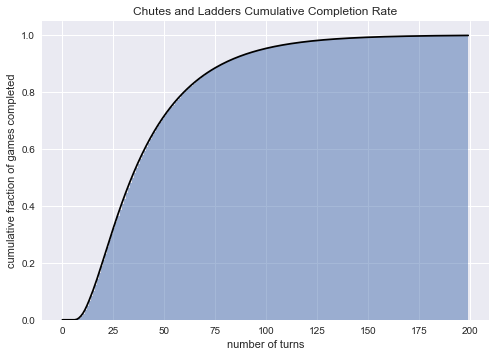

In [17]:
plt.hist(sim_games, bins=range(200), density=True,
 align='mid', cumulative=True, alpha=0.5);
plt.plot(np.arange(200), probs, color='black');
plt.title('Chutes and Ladders Cumulative Completion Rate')
plt.xlabel('number of turns')
plt.ylabel('cumulative fraction of games completed');

In [18]:
turns = np.arange(1, len(probs))
np.dot(np.diff(probs), turns)

41.96834209704236

In [19]:
np.searchsorted(probs, 0.5)

34

In [20]:
np.argmax(np.diff(probs)) + 1

22

In [21]:
np.searchsorted(probs, [0.025, 0.975])

array([ 11, 118], dtype=int64)

In [22]:
np.searchsorted(probs, [0.25, 0.75])

array([22, 54], dtype=int64)

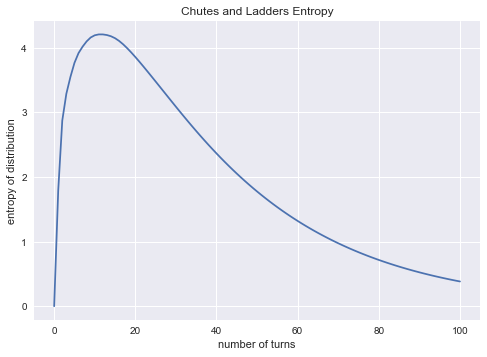

In [24]:
import numpy as np
from scipy import stats
turns = np.arange(101)
entropy = [stats.entropy(cl_probability(turn)) for turn in turns]
plt.plot(turns, entropy)
plt.xlabel('number of turns')
plt.ylabel('entropy of distribution')
plt.title('Chutes and Ladders Entropy');

In [25]:
np.argmax(entropy)

11

In [26]:
evals, evecs = np.linalg.eig(mat)
evals[:10]

array([1.  +0.j  , 0.83+0.j  , 0.96+0.j  , 0.81+0.j  , 0.68+0.29j,
       0.68-0.29j, 0.39+0.65j, 0.39-0.65j, 0.53+0.43j, 0.53-0.43j])

In [27]:
evecs[:, 0]

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [28]:
M = cl_markov_matrix(jump_at_end=False)
N = np.linalg.inv(np.eye(100) - M[:100, :100])

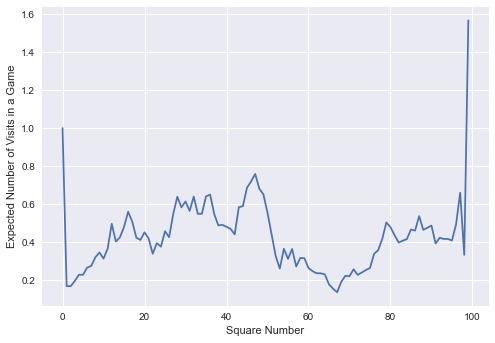

In [29]:
expected_visits = N[:, 0]
plt.plot(expected_visits)
plt.xlabel('Square Number')
plt.ylabel('Expected Number of Visits in a Game');

In [30]:
col = N[:, 0]
np.argsort(col)[::-1][:5]

array([99,  0, 47, 46, 45], dtype=int64)

In [31]:
np.argsort(col)[:5]

array([67, 66,  1,  2, 65], dtype=int64)

In [32]:
col[87]

0.5361271921661372

In [33]:
col[28]

0.6381904888540548

In [34]:
np.set_printoptions(precision=1)
np.dot(N.T, np.ones(100))

array([42.7, 38.7, 43.2, 42.7, 40.5, 42.8, 42.6, 42.3, 42.1, 40. , 42.1,
       41.6, 41.2, 40.8, 40.5, 40. , 42.6, 38.8, 38.6, 38.5, 38.5, 37.4,
       36.5, 37.1, 37.6, 37.9, 38.2, 38.4, 24. , 40.7, 40.2, 40. , 39.9,
       39.6, 39.4, 39.1, 37.3, 39. , 38.7, 38.2, 37.8, 37.8, 37.4, 38. ,
       37.3, 35.1, 35.1, 38.2, 34.5, 41.6, 33.4, 21.7, 35.1, 34.8, 34.2,
       33.6, 34.8, 33. , 34.4, 32.6, 31. , 29.7, 38.5, 26. , 42.6, 21.6,
       21.7, 21.7, 21.3, 21.1, 21.1, 16.8, 21.9, 21.9, 18.9, 20.1, 21. ,
       21.6, 21.9, 22.1,  1. , 27.3, 26.1, 25. , 24. , 23. , 22.2, 37.6,
       18.6, 18.8, 17.8, 16.8, 17.6, 21.9, 12.8, 20.1, 11.3, 11.3, 21.9,
        6. ])